# Application of the classification algorithms

### Project title : Application scorecard for new customers

#### The scorecard is intended to detect whether the new customer will default (failure to repay a loan installment for more than 90 days)

#### As per the nature of the problem at handle to be solved,this will require building a classfication model.

#### The different classification models are going to be evaluated to identify the one the suits the project. These are;

* Support Vector Machine (SVM)

* Logistic Regression

* KNearestNeighbors

* Decision Tree

* Random forest

#### importing the libraries to used throughout the development of the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV,StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score
import warnings
import pickle

##### suppressing all the warning throughout the development

In [2]:
warnings.filterwarnings("ignore")

#### Building a fuction that will aid in the load and wrangling of the imported dataframe

##### After importing the data from the provided excel sheet into a pandas dataframe, the following data validation is to be applied.

* Checking the imported dataframe for any null values

* The data types of all the features have to be crossed checked so as to confirm the alignment with the dictionary information

* As the data in the excel sheet was already encoded, we have to confirm the number of unique values in the encoded columns if they match those of the dictionary.

* We have to identify the features to used as the predictive variables and the target feature.

* With "RESPONSE" as the target feature, the rest of the features will be predictive variables

* The observation  (OBS#) feature will have to be dropped out from the predictive features 


In [3]:
def load_check_file(filepath):
    
    df = pd.read_excel(filepath)
    
    df.drop(columns="OBS#",inplace=True)
    
    return df

data = load_check_file("classification_dataset.xlsx")

data.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [4]:
# checking out for null values within the dataframe.
# Running the code below, return an empty series indicating that there are no null values within the dataframe

data.isnull().sum()[data.isnull().sum()> 0]

Series([], dtype: int64)

In [5]:
# checking out for number of unique values from the encoded columns if they match with the dictionary information.
# the maximum number of unique values expected is five (5) and the minimum is two (2), everything is on well.
data.nunique()[data.nunique()<6]

CHK_ACCT            4
HISTORY             5
NEW_CAR             2
USED_CAR            2
FURNITURE           2
RADIO/TV            2
EDUCATION           2
RETRAINING          2
SAV_ACCT            5
EMPLOYMENT          5
INSTALL_RATE        4
MALE_DIV            2
MALE_SINGLE         2
MALE_MAR_or_WID     2
CO-APPLICANT        2
GUARANTOR           2
PRESENT_RESIDENT    4
REAL_ESTATE         2
PROP_UNKN_NONE      2
OTHER_INSTALL       2
RENT                2
OWN_RES             2
NUM_CREDITS         4
JOB                 4
NUM_DEPENDENTS      2
TELEPHONE           2
FOREIGN             2
RESPONSE            2
dtype: int64

In [6]:
# checking datatypes of the features.
# all the featues must be numeric, thus selecting object datatype feature, the result must be null
# running the code below confirms that all the features are numeric

data.select_dtypes(object).head(2)

""
0
1


#### Preparing the data for building the models

* identifying and defining the target (y) and the predictive features (X); and knowing their shapes

In [7]:
target = "RESPONSE"

X = data.drop(columns = target)

y = data[target]

X.shape,y.shape

((1000, 30), (1000,))

##### The predictive features have to scaled so as to have a mean of zero (0) and standard deviation of one, with help of standard scaler.

##### This synchronizes the scales of the featues.

In [8]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_scaled.describe().iloc[:3,:]

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.019807e-17,1.136868e-16,-3.730349e-17,7.460699e-17,3.019807e-17,-4.973799e-17,-4.263256e-17,-1.127987e-16,-5.329071e-18,6.661338e-17,...,-3.330669e-17,5.329071e-17,4.618528e-17,-6.394885e-17,5.329071e-17,-9.414691e-17,5.684342e-17,-1.065814e-17,-7.993606e-17,6.750156e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00


##### Split of the X and y features into the training and test data with a test size of 20%

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 30), (200, 30), (800,), (200,))

##### checking if the training data balances (y_train)

In [10]:
y_train.value_counts()

1    559
0    241
Name: RESPONSE, dtype: int64

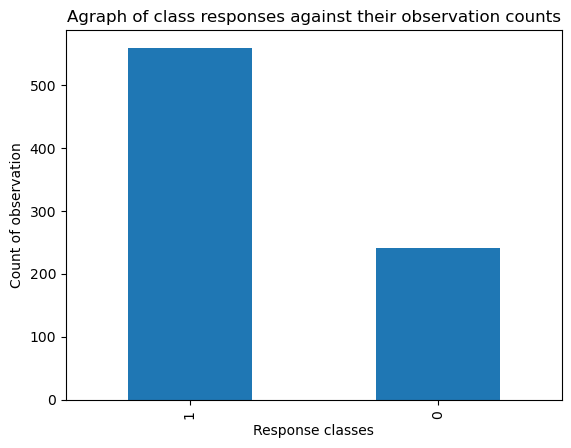

In [11]:
y_train.value_counts().plot(kind="bar")

plt.xlabel("Response classes")

plt.ylabel("Count of observation")

plt.title("Agraph of class responses against their observation counts");

### Building the naive (with default settings) models 

* The models are fitted with the training data

* The performance of the models to be evaluated on both the training and test data

In [12]:
Naive_LR = LogisticRegression()

Naive_RF = RandomForestClassifier()

Naive_SVC = SVC()

Naive_KNN = KNeighborsClassifier()

Naive_DT = DecisionTreeClassifier()

Naive_models = [Naive_LR,Naive_RF,Naive_SVC,Naive_KNN,Naive_DT]

models_1 = ["Naive_LR","Naive_RF","Naive_SVC","Naive_KNN","Naive_DT"]

f1_scores_train = []

f1_scores_test = []

acc_train = []

acc_test = []

for model in Naive_models:
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_train.to_numpy())
    
    f1_scores_train.append(round(f1_score(y_train,y_pred),5))
    
    acc_train.append(round(accuracy_score(y_train,y_pred),5))
    
    y_pred_test = model.predict(X_test.to_numpy())
    
    f1_scores_test.append(round(f1_score(y_test,y_pred_test),5))
    
    acc_test.append(round(accuracy_score(y_test,y_pred_test),5))
    

In [13]:
df_naive_models = pd.DataFrame({"models":models_1,"f1_scores_train":f1_scores_train,
                                "accuracy_train":acc_train,"f1_scores_test":f1_scores_test,
                                 "accuracy_test":acc_test})

df_naive_models["diff_acc_naive"] = df_naive_models["accuracy_train"]-df_naive_models["accuracy_test"]

df_naive_models

,models,f1_scores_train,accuracy_train,f1_scores_test,accuracy_test,diff_acc_naive
0,Naive_LR,0.84910,0.77875,0.86486,0.800,-0.02125
1,Naive_RF,1.00000,1.00000,0.83721,0.755,0.24500
2,Naive_SVC,0.91751,0.87750,0.86093,0.790,0.08750
3,Naive_KNN,0.86482,0.79875,0.80822,0.720,0.07875
4,Naive_DT,1.00000,1.00000,0.81004,0.735,0.26500


#####  From the above table reflecting the model training and test accuracy scores, the difference of the accuracy scores was obtained as

#####  (accuracy train - accuracy test). Its expected for the difference to be negative as this will imply an improved performace on unsee

#####  data. For those were the difference is positive, this signifies an overfitting problem which has to be reduced as much as 

#####  possible. This is why in the next section we shall apply hyperparameter tuning for the models. 

### Applying hyperparameter tuning to obtained the best estimators of the different models.

* the above fitted naive models were performing well however, we need to be prepared for overfitting problem hence hyperparameter tuning

* with the help of the RandomizedSearchCV, we shall tune the various model hyperparameters

* since the data was imbalanced, stratifiedKFold will be used when creating the folds.

* best scores and best parameters for the different tuned models will be captured in a dataframe for evaluation.

In [14]:
LR = LogisticRegression()

DT = DecisionTreeClassifier()

KNN = KNeighborsClassifier()

m_SVC = SVC()

RF = RandomForestClassifier()

param_lr = {"penalty":["l1","l2","elasticnet"], "solver": ["lbfgs","liblinear","newton-cg","sag","saga"], "max_iter":[100,1000,2500,5000,5500,15000]}

param_dt = {"criterion":["gini","entropy","log_loss"],"max_depth":range(1,30),"max_features":["auto","sqrt","log2"]}

param_knn = { "n_neighbors" : range(2,12)}

param_svc = {"kernel":["rbf","sigmoid","poly"], "C": [0.1,1.0,10.0,100.0,1000.0],"gamma":[0.00001,0.0001,0.001,0.01,0.1,1.0]}

param_rf = {"n_estimators": range(10,200,10),"max_depth": range(2,19),"criterion": ["gini", "entropy"],"max_features": ["sqrt","log2"]}

params = [param_lr,param_dt,param_knn,param_svc,param_rf]

models_cv = [LR,DT,KNN,m_SVC,RF]

models_gsc = ["LR","DT","KNN","SVC","RF"]

sk_folds = StratifiedKFold(n_splits=10)

best_scores = []

best_parameters = []

for param,model in zip(params,models_cv):
    
    grid_cv = RandomizedSearchCV(model,param_distributions=param,cv=sk_folds,verbose=True,n_jobs=-1)
    
    grid_cv.fit(X_train,y_train)
    
    best_scores.append(round(grid_cv.best_score_,5)) 
    
    best_parameters.append(grid_cv.best_params_)
    

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [15]:
pd.set_option("max_colwidth",None)
              
df_hyper = pd.DataFrame({"models":models_gsc,"best scores":best_scores,"best params":best_parameters})

df_hyper

,models,best scores,best params
0,LR,0.75375,"{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000}"
1,DT,0.69500,"{'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}"
2,KNN,NaN,{'n_neighbors': 2}
3,SVC,0.70500,"{'kernel': 'poly', 'gamma': 0.1, 'C': 1.0}"
4,RF,0.76625,"{'n_estimators': 170, 'max_features': 'sqrt', 'max_depth': 18, 'criterion': 'gini'}"


###  

### Building the tunned  (with set hyperparameters) models 

* The models are fitted with the training data

* The performance of the models to be evaluated on both the training and test data

###### (below are the parameters that were obtained at the time of generating the report)

In [16]:
model_lr = LogisticRegression(random_state=42,solver="lbfgs",penalty="l2",max_iter=1000)

model_rf = RandomForestClassifier(random_state=42, n_estimators=150,max_features="log2",max_depth=18,criterion="gini")

model_svc = SVC(random_state=42,kernel="sigmoid",gamma=0.0001,C=1000.0)

model_knn = KNeighborsClassifier(n_neighbors=10)

model_dt = DecisionTreeClassifier(random_state=42,max_features="sqrt",max_depth=11,criterion="gini")

models_tuned = [model_rf,model_lr,model_svc,model_knn,model_dt]

models_t = ["model_lr","model_rf","model_svc","model_knn","model_dt"]

f1_scores_train_t = []

f1_scores_test_t = []

acc_train_t = []

acc_test_t = []

for model in models_tuned:
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_train.to_numpy())
    
    f1_scores_train_t.append(round(f1_score(y_train,y_pred),5))
    
    acc_train_t.append(round(accuracy_score(y_train,y_pred),5))
    
    y_pred_test_t = model.predict(X_test.to_numpy())
    
    f1_scores_test_t.append(round(f1_score(y_test,y_pred_test),5))
    
    acc_test_t.append(round(accuracy_score(y_test,y_pred_test),5))

In [17]:
df_models_tuned = pd.DataFrame({"models":models_t,"f1_scores_train_t":f1_scores_train_t,
                                "accuracy_train_t":acc_train_t,"f1_scores_test_t":f1_scores_test_t,
                                 "accuracy_test_t":acc_test_t})

df_models_tuned["diff_acc_tuned"] = df_models_tuned["accuracy_train_t"]-df_models_tuned["accuracy_test_t"]

df_models_tuned

,models,f1_scores_train_t,accuracy_train_t,f1_scores_test_t,accuracy_test_t,diff_acc_tuned
0,model_lr,1.00000,1.00000,0.81004,0.735,0.26500
1,model_rf,0.84910,0.77875,0.81004,0.735,0.04375
2,model_svc,0.84936,0.77875,0.81004,0.735,0.04375
3,model_knn,0.85254,0.78250,0.81004,0.735,0.04750
4,model_dt,0.93666,0.91125,0.81004,0.735,0.17625


#### with reference to the above table, its only the Logistic Regression model that still has the issue of overfitting, the rest can generalize

In [19]:
df_tuned_naive = pd.concat([df_models_tuned.iloc[:,[0,5]],df_naive_models.iloc[:,5]],axis=1)

df_tuned_naive

,models,diff_acc_tuned,diff_acc_naive
0,model_lr,0.26500,-0.02125
1,model_rf,0.04375,0.24500
2,model_svc,0.04375,0.08750
3,model_knn,0.04750,0.07875
4,model_dt,0.17625,0.26500


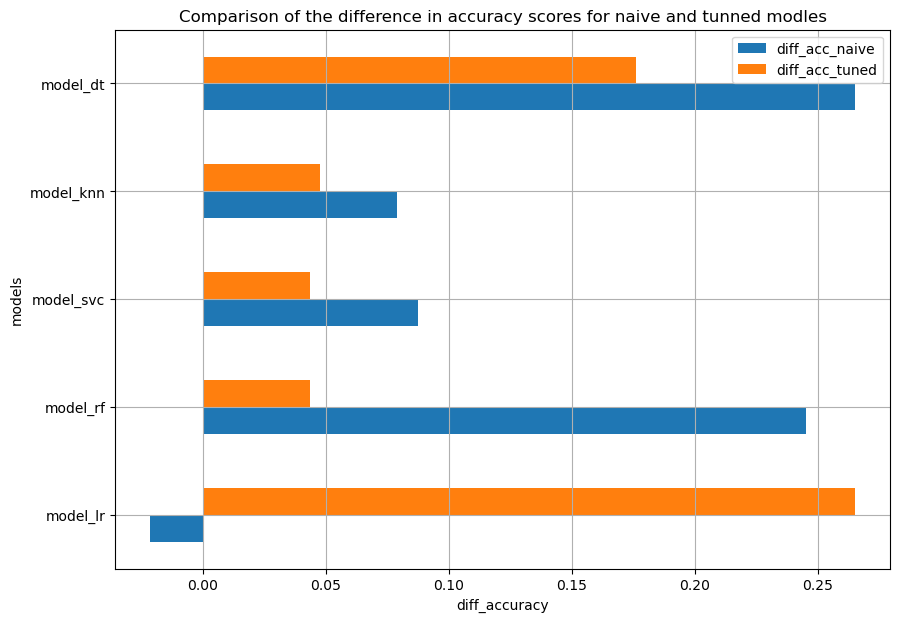

In [20]:
fig, ax = plt.subplots(figsize=(10,7))

df_tuned_naive.plot(x="models",y=["diff_acc_naive","diff_acc_tuned"],kind="barh",ax=ax)

plt.xlabel("diff_accuracy")

plt.title("Comparison of the difference in accuracy scores for naive and tunned modles")

plt.grid();

### The final model to used for the solving the classification is a Decision Tree.

* the hyperparameters to used are list above.

* at the time of runing this code the parameters were max_features="sqrt",max_depth=11,criterion="gini"

In [21]:
Decision_tree_model = DecisionTreeClassifier(random_state=42,max_features="sqrt",max_depth=11,criterion="gini")

Decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, max_features='sqrt', random_state=42)

* evaluating the performance of the model on the trainig data

In [22]:
y_train_pred = Decision_tree_model.predict(X_train)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       241
           1       0.93      0.94      0.94       559

    accuracy                           0.91       800
   macro avg       0.90      0.89      0.89       800
weighted avg       0.91      0.91      0.91       800



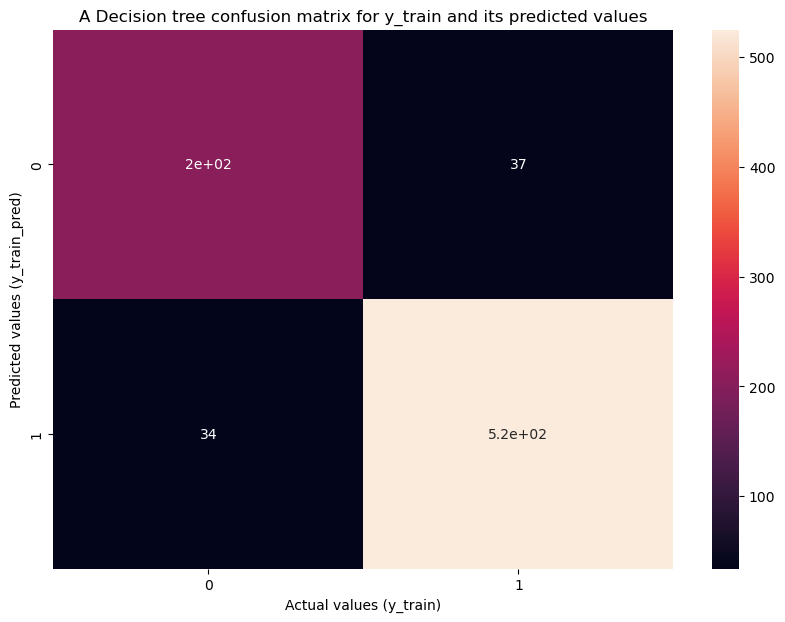

In [23]:
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

plt.xlabel("Actual values (y_train)")

plt.ylabel("Predicted values (y_train_pred)")

plt.title("A Decision tree confusion matrix for y_train and its predicted values");

In [24]:
feat_imp = pd.DataFrame({"featues" : X_train.columns,"importances" : Decision_tree_model.feature_importances_}).sort_values("importances",ascending=False).head(10)

feat_imp

,featues,importances
0,CHK_ACCT,0.139348
1,DURATION,0.137453
21,AGE,0.098068
11,EMPLOYMENT,0.090418
9,AMOUNT,0.064475
10,SAV_ACCT,0.047868
12,INSTALL_RATE,0.046023
26,JOB,0.045425
18,PRESENT_RESIDENT,0.041522
22,OTHER_INSTALL,0.031652


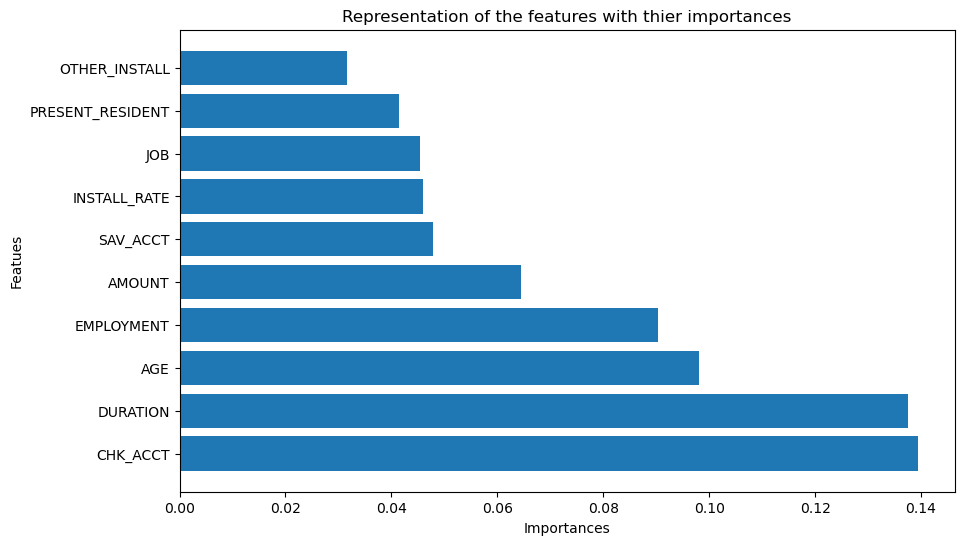

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

plt.barh(feat_imp.iloc[:,0],feat_imp.iloc[:,1])

plt.xlabel("Importances")

plt.ylabel("Featues")

plt.title("Representation of the features with thier importances");

## Saving the model

* model to be saved as "Application scorecard"

In [26]:
with open ("Application_scorecard_1","wb") as f:
    
    pickle.dump (Decision_tree_model,f)

####    

### The final model to used for the solving the classification is a Random forest.

* the hyperparameters to used are list above.

* at the time of runing this code the parameters were n_estimators=150,max_features="log2",max_depth=18,criterion="gini" 'criterion': 'gini

In [27]:
Random_forest_model = RandomForestClassifier(random_state=42,n_estimators=150,max_features="log2",max_depth=18,criterion="gini")

Random_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, max_features='log2', n_estimators=150,
                       random_state=42)

* evaluating the performance of the model on the trainig data 

In [28]:
y_train_pred = Random_forest_model.predict(X_train)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       559

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



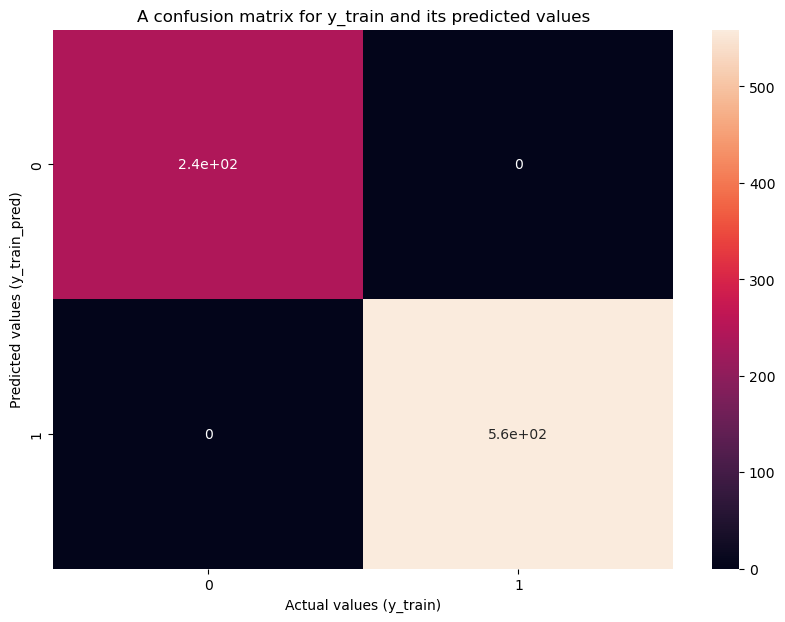

In [29]:
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

plt.xlabel("Actual values (y_train)")

plt.ylabel("Predicted values (y_train_pred)")

plt.title("A confusion matrix for y_train and its predicted values");

### 

* evaluating the performance of finam model on the unseen test data

In [30]:
y_test_pred = Random_forest_model.predict(X_test)

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.46      0.55        59
           1       0.80      0.91      0.85       141

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.77      0.78      0.76       200



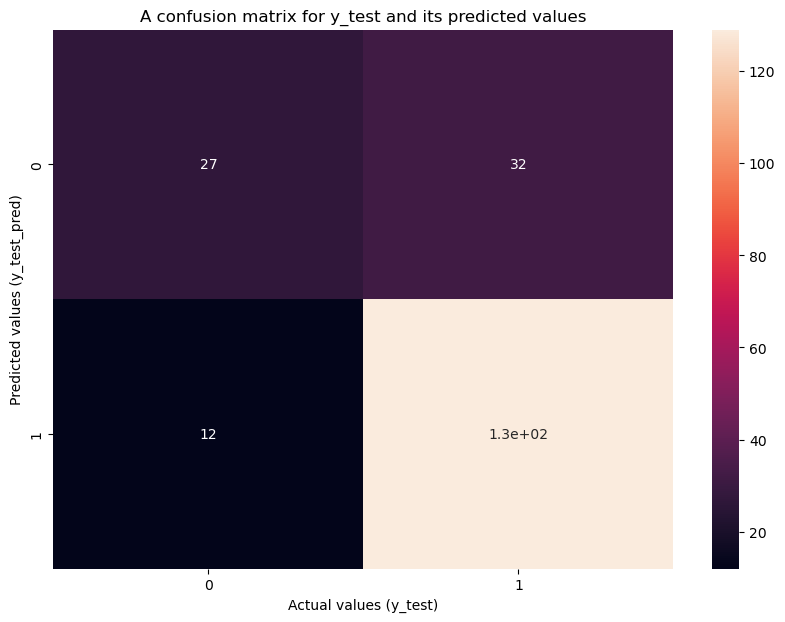

In [31]:
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

plt.xlabel("Actual values (y_test)")

plt.ylabel("Predicted values (y_test_pred)")

plt.title("A confusion matrix for y_test and its predicted values");

###  

In [32]:
feat_imp = pd.DataFrame({"featues" : X_train.columns,"importances" : Random_forest_model.feature_importances_}).sort_values("importances",ascending=False).head(10)

feat_imp

,featues,importances
9,AMOUNT,0.125245
21,AGE,0.103414
0,CHK_ACCT,0.098104
1,DURATION,0.089588
2,HISTORY,0.062917
11,EMPLOYMENT,0.056755
10,SAV_ACCT,0.044006
12,INSTALL_RATE,0.042552
18,PRESENT_RESIDENT,0.042205
26,JOB,0.031204


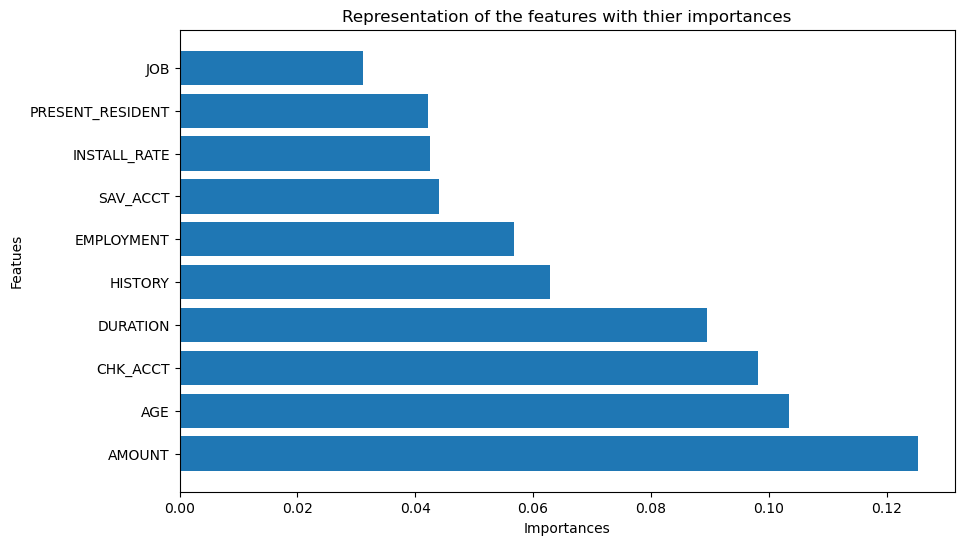

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

plt.barh(feat_imp.iloc[:,0],feat_imp.iloc[:,1])

plt.xlabel("Importances")

plt.ylabel("Featues")

plt.title("Representation of the features with thier importances");

# 

## Saving the model 2

* model to be saved as "Application scorecard_2"

In [34]:
with open ("Application_scorecard_2","wb") as f:
    
    pickle.dump (Random_forest_model,f)

#### Report prepared by Kasozi Abudusalaamu